# Libraries

In [2]:
library(tidyr)
library(stringr)
library(tidyverse)
library(modeest)

# First Portfolio Part

0. Test the data

In [3]:
TB <- tidyr::who

In [4]:
View(TB)

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1983,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1984,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1985,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1986,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1987,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1988,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


1. Create the Who1 Dataset

From the original data; select the wanted columns, assign new columns and remove nulls for the new dataset using pivot_longer

In [5]:
Who1 <- pivot_longer(TB, 
    new_sp_m014:newrel_f65, # Selecting Columns 
    names_to= "Key", #Assigning the names column
    values_to = "Cases", #Assigning the values columns
    values_drop_na = TRUE) #Removing Null Values

In [6]:
View(Who1)

country,iso2,iso3,year,Key,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1997,new_sp_m1524,10
Afghanistan,AF,AFG,1997,new_sp_m2534,6
Afghanistan,AF,AFG,1997,new_sp_m3544,3
Afghanistan,AF,AFG,1997,new_sp_m4554,5
Afghanistan,AF,AFG,1997,new_sp_m5564,2
Afghanistan,AF,AFG,1997,new_sp_m65,0
Afghanistan,AF,AFG,1997,new_sp_f014,5
Afghanistan,AF,AFG,1997,new_sp_f1524,38


2. Fixing the variables' names for consistency

Using mutate to replace the values in the key column with new values after using str_replace to fix the names

In [7]:
Who2 <- mutate(Who1,Key = str_replace(Who1$Key, 'newrel' ,"new_rel"))
# 'Key =' replaces the values in the Key cloumn with the new replacement value in str_replace

In [8]:
View(Who2)

country,iso2,iso3,year,Key,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1997,new_sp_m1524,10
Afghanistan,AF,AFG,1997,new_sp_m2534,6
Afghanistan,AF,AFG,1997,new_sp_m3544,3
Afghanistan,AF,AFG,1997,new_sp_m4554,5
Afghanistan,AF,AFG,1997,new_sp_m5564,2
Afghanistan,AF,AFG,1997,new_sp_m65,0
Afghanistan,AF,AFG,1997,new_sp_f014,5
Afghanistan,AF,AFG,1997,new_sp_f1524,38


3. Running the specified code

In [9]:
Who3 <- Who2 %>% 
separate(Key, c("new", "type", "sexage"), sep = "_")

%>% provides a pipe for the separate function where the changes would be made on the Who2 data

An alternative to 'Who2 %>%' would be to use Who2 in the function: separate(Who2, Key, c("new", "type", "sexage"), sep = "_")

In [10]:
View(Who3)

country,iso2,iso3,year,new,type,sexage,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1997,new,sp,m014,0
Afghanistan,AF,AFG,1997,new,sp,m1524,10
Afghanistan,AF,AFG,1997,new,sp,m2534,6
Afghanistan,AF,AFG,1997,new,sp,m3544,3
Afghanistan,AF,AFG,1997,new,sp,m4554,5
Afghanistan,AF,AFG,1997,new,sp,m5564,2
Afghanistan,AF,AFG,1997,new,sp,m65,0
Afghanistan,AF,AFG,1997,new,sp,f014,5
Afghanistan,AF,AFG,1997,new,sp,f1524,38


4. Separating sexage into sex and age

In [11]:
Who4 <- separate(Who3, sexage, c("sex", "age"), sep = 1)
# in this function 'sep=1' separates the first value of the string from the rest of the string

In [12]:
View(Who4)

country,iso2,iso3,year,new,type,sex,age,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1997,new,sp,m,014,0
Afghanistan,AF,AFG,1997,new,sp,m,1524,10
Afghanistan,AF,AFG,1997,new,sp,m,2534,6
Afghanistan,AF,AFG,1997,new,sp,m,3544,3
Afghanistan,AF,AFG,1997,new,sp,m,4554,5
Afghanistan,AF,AFG,1997,new,sp,m,5564,2
Afghanistan,AF,AFG,1997,new,sp,m,65,0
Afghanistan,AF,AFG,1997,new,sp,f,014,5
Afghanistan,AF,AFG,1997,new,sp,f,1524,38


5. Displaying the first and last 5 rows of the Who4 Dataset

Using head to display the first 5 rows:

In [13]:
head(Who4, 5)

country,iso2,iso3,year,new,type,sex,age,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1997,new,sp,m,014,0
Afghanistan,AF,AFG,1997,new,sp,m,1524,10
Afghanistan,AF,AFG,1997,new,sp,m,2534,6
Afghanistan,AF,AFG,1997,new,sp,m,3544,3
Afghanistan,AF,AFG,1997,new,sp,m,4554,5


Using tail to display the last 5 rows:

In [14]:
tail(Who4,5)

country,iso2,iso3,year,new,type,sex,age,Cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
Zimbabwe,ZW,ZWE,2013,new,rel,f,2534,4649
Zimbabwe,ZW,ZWE,2013,new,rel,f,3544,3526
Zimbabwe,ZW,ZWE,2013,new,rel,f,4554,1453
Zimbabwe,ZW,ZWE,2013,new,rel,f,5564,811
Zimbabwe,ZW,ZWE,2013,new,rel,f,65,725


6. Saving the Who4 dataset into a CSV file

In [15]:
write.csv(Who4, 'Who4.csv')

# Second Portfolio Part

1. Mean, Median, and Mode of sepal length

Note: I tried 'na.rm = TRUE' for the functions and the results are indifferent without it

In [16]:
SL <- iris$Sepal.Length #Take the Sepal Length Column as a list

In [17]:
print('The mean of iris sepal length is:')
mean(SL) # geting the mean

[1] "The mean of iris sepal length is:"


[1] 5.843333

In [18]:
print('The median of iris sepal length is:')
median(SL) # geting the median

[1] "The median of iris sepal length is:"


[1] 5.8

In [19]:
print('The mode of iris sepal length is:')
mfv(SL) # geting the mode

[1] "The mode of iris sepal length is:"


[1] 5

2. Seeing How spread out the sepal length data is

In [20]:
print('The maximum value in iris sepal length is:')
max(SL) # Calculating the max value, can be computed using range(SL)[2]

[1] "The maximum value in iris sepal length is:"


[1] 7.9

In [21]:
print('The minimum value in iris sepal length is:')
min(SL) # Computing the min value, can be computed using range(SL)[1]

[1] "The minimum value in iris sepal length is:"


[1] 4.3

In [22]:
Range = range(SL)[2] - range(SL)[1] # Calculating the range value to see how "Spread Out" the data is
print('The range value in iris sepal length is:')
print(Range)

[1] "The range value in iris sepal length is:"
[1] 3.6


3. Calculating the interquartile (IQR) range of sepal length

In [23]:
print('The IQR range value in iris sepal length is:')
IQR(SL) #Computes the IQR value

[1] "The IQR range value in iris sepal length is:"


[1] 1.3

In [24]:
Q = quantile(SL) #Shows all quartiles in one variable (from 0% to 100%)

InterQ = as.double(Q[4] - Q[2]) # as.double used to show only a double value
print('The IQR range value calculated using "quantile()" in iris sepal length is:') 
InterQ

[1] "The IQR range value calculated using \"quantile()\" in iris sepal length is:"


[1] 1.3

###### There is no difference in the result when using 'IQR' or 'Quantile' to find the IQR value, 'IQR' would do the same steps faster and at once.

4. Computing the variance and standard deviation

In [26]:
print('The variance value in iris sepal length is:')
var(SL) #Get the variance value

[1] "The variance value in iris sepal length is:"


[1] 0.6856935

In [27]:
print('The standard deviation value in iris sepal length is:')
sd(SL) # Get the Standard Deviation value

[1] "The standard deviation value in iris sepal length is:"


[1] 0.8280661

5. Showing min, max, median, 1st and 3rd quartiles all at once 

In [28]:
summary(SL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

6. using the 'sapply()' function to calculate the mean and quantiles of each column:

Using Sapply to get the mean values

In [29]:
sapply(iris[1:4],mean) #Removing the 5th column as it is a string

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

Using Sapply to get the quantile values

In [30]:
sapply(iris[1:4],quantile)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0%,4.3,2.0,1.00,0.1
25%,5.1,2.8,1.60,0.3
50%,5.8,3.0,4.35,1.3
75%,6.4,3.3,5.10,1.8
100%,7.9,4.4,6.90,2.5


7. Creating the histogram

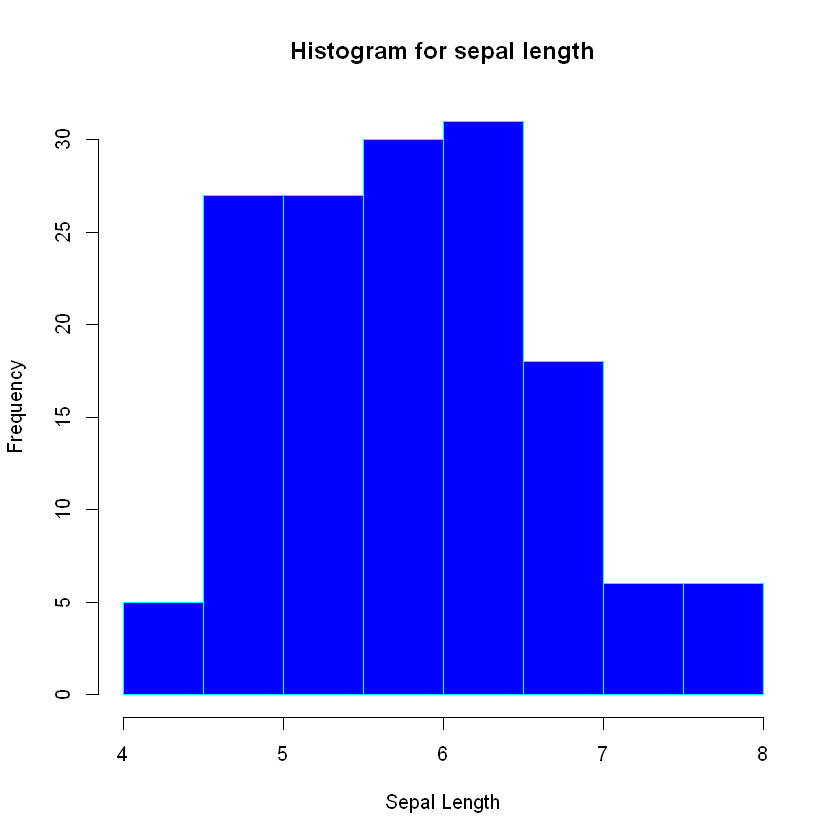

In [31]:
# Main is for title, xlab is for x-label, col is for bar colors, and border is for borders color

hist(SL, main = 'Histogram for sepal length', xlab = 'Sepal Length', col = 'blue', border ='cyan')

8. Creating the box-plot

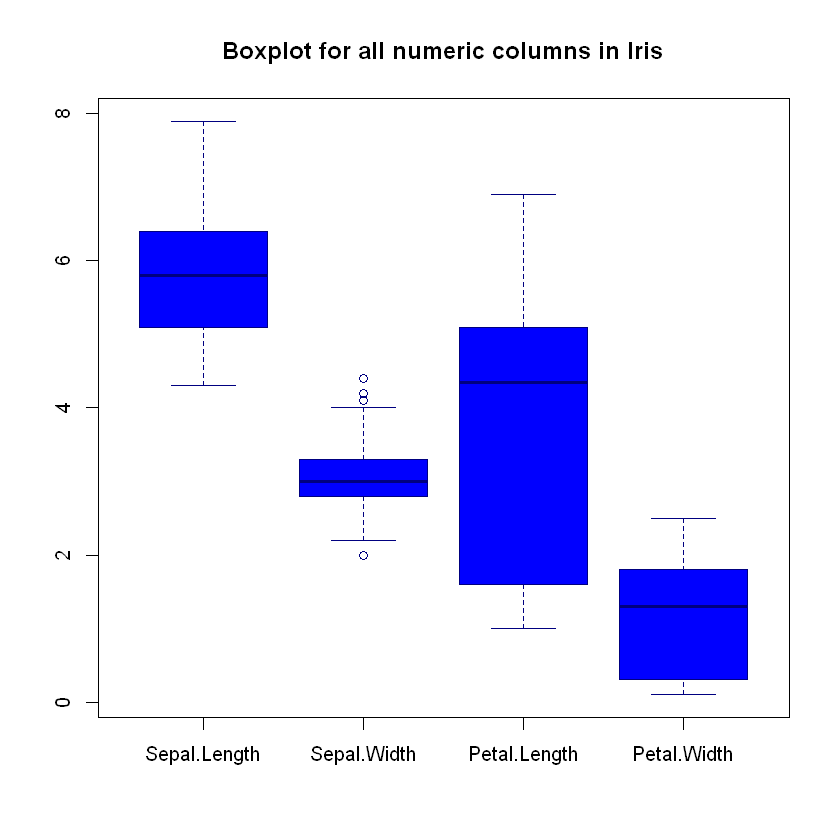

In [32]:
boxplot(iris[1:4], main = 'Boxplot for all numeric columns in Iris', col= 'Blue', border='Navy')

9. Creating the QQ-plot

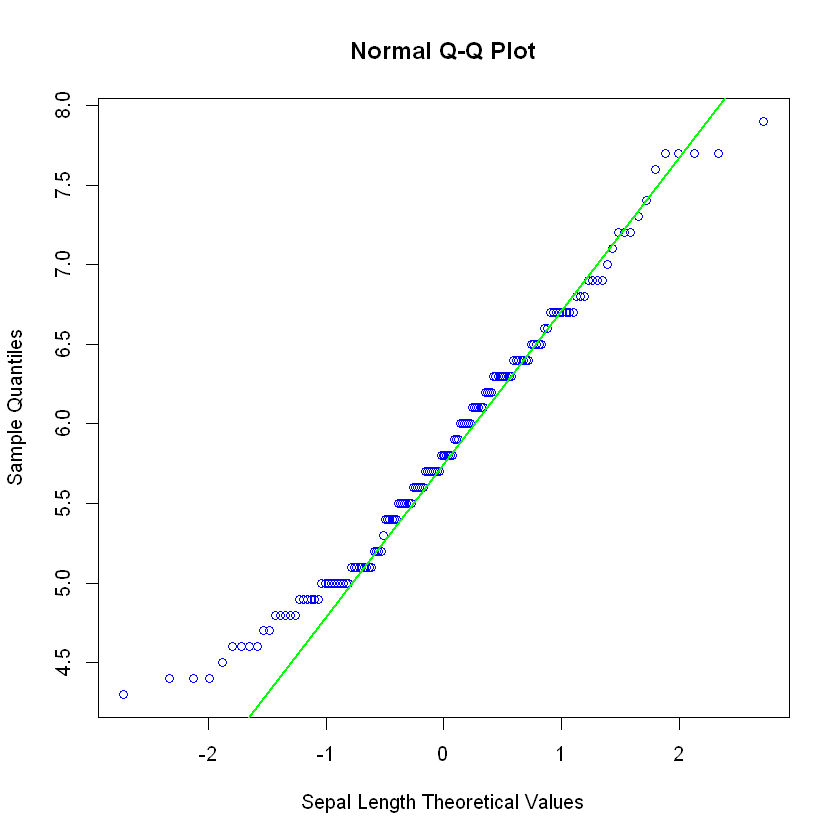

In [33]:
qqnorm(SL, xlab = 'Sepal Length Theoretical Values', col='blue')
qqline(SL, col='Green', lwd=2) # "lwd" specifies the line width

# Third Portfolio Part

Checking the data:

In [20]:
mpg = ggplot2::mpg
head(mpg,7)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


Setting the figures' sizes:

In [17]:
options(repr.plot.width=18, repr.plot.height=11)

### Q1:
Plot and explain: Which vehicle brand (or manufacturer) offers the best mpg in both city and in the highway?

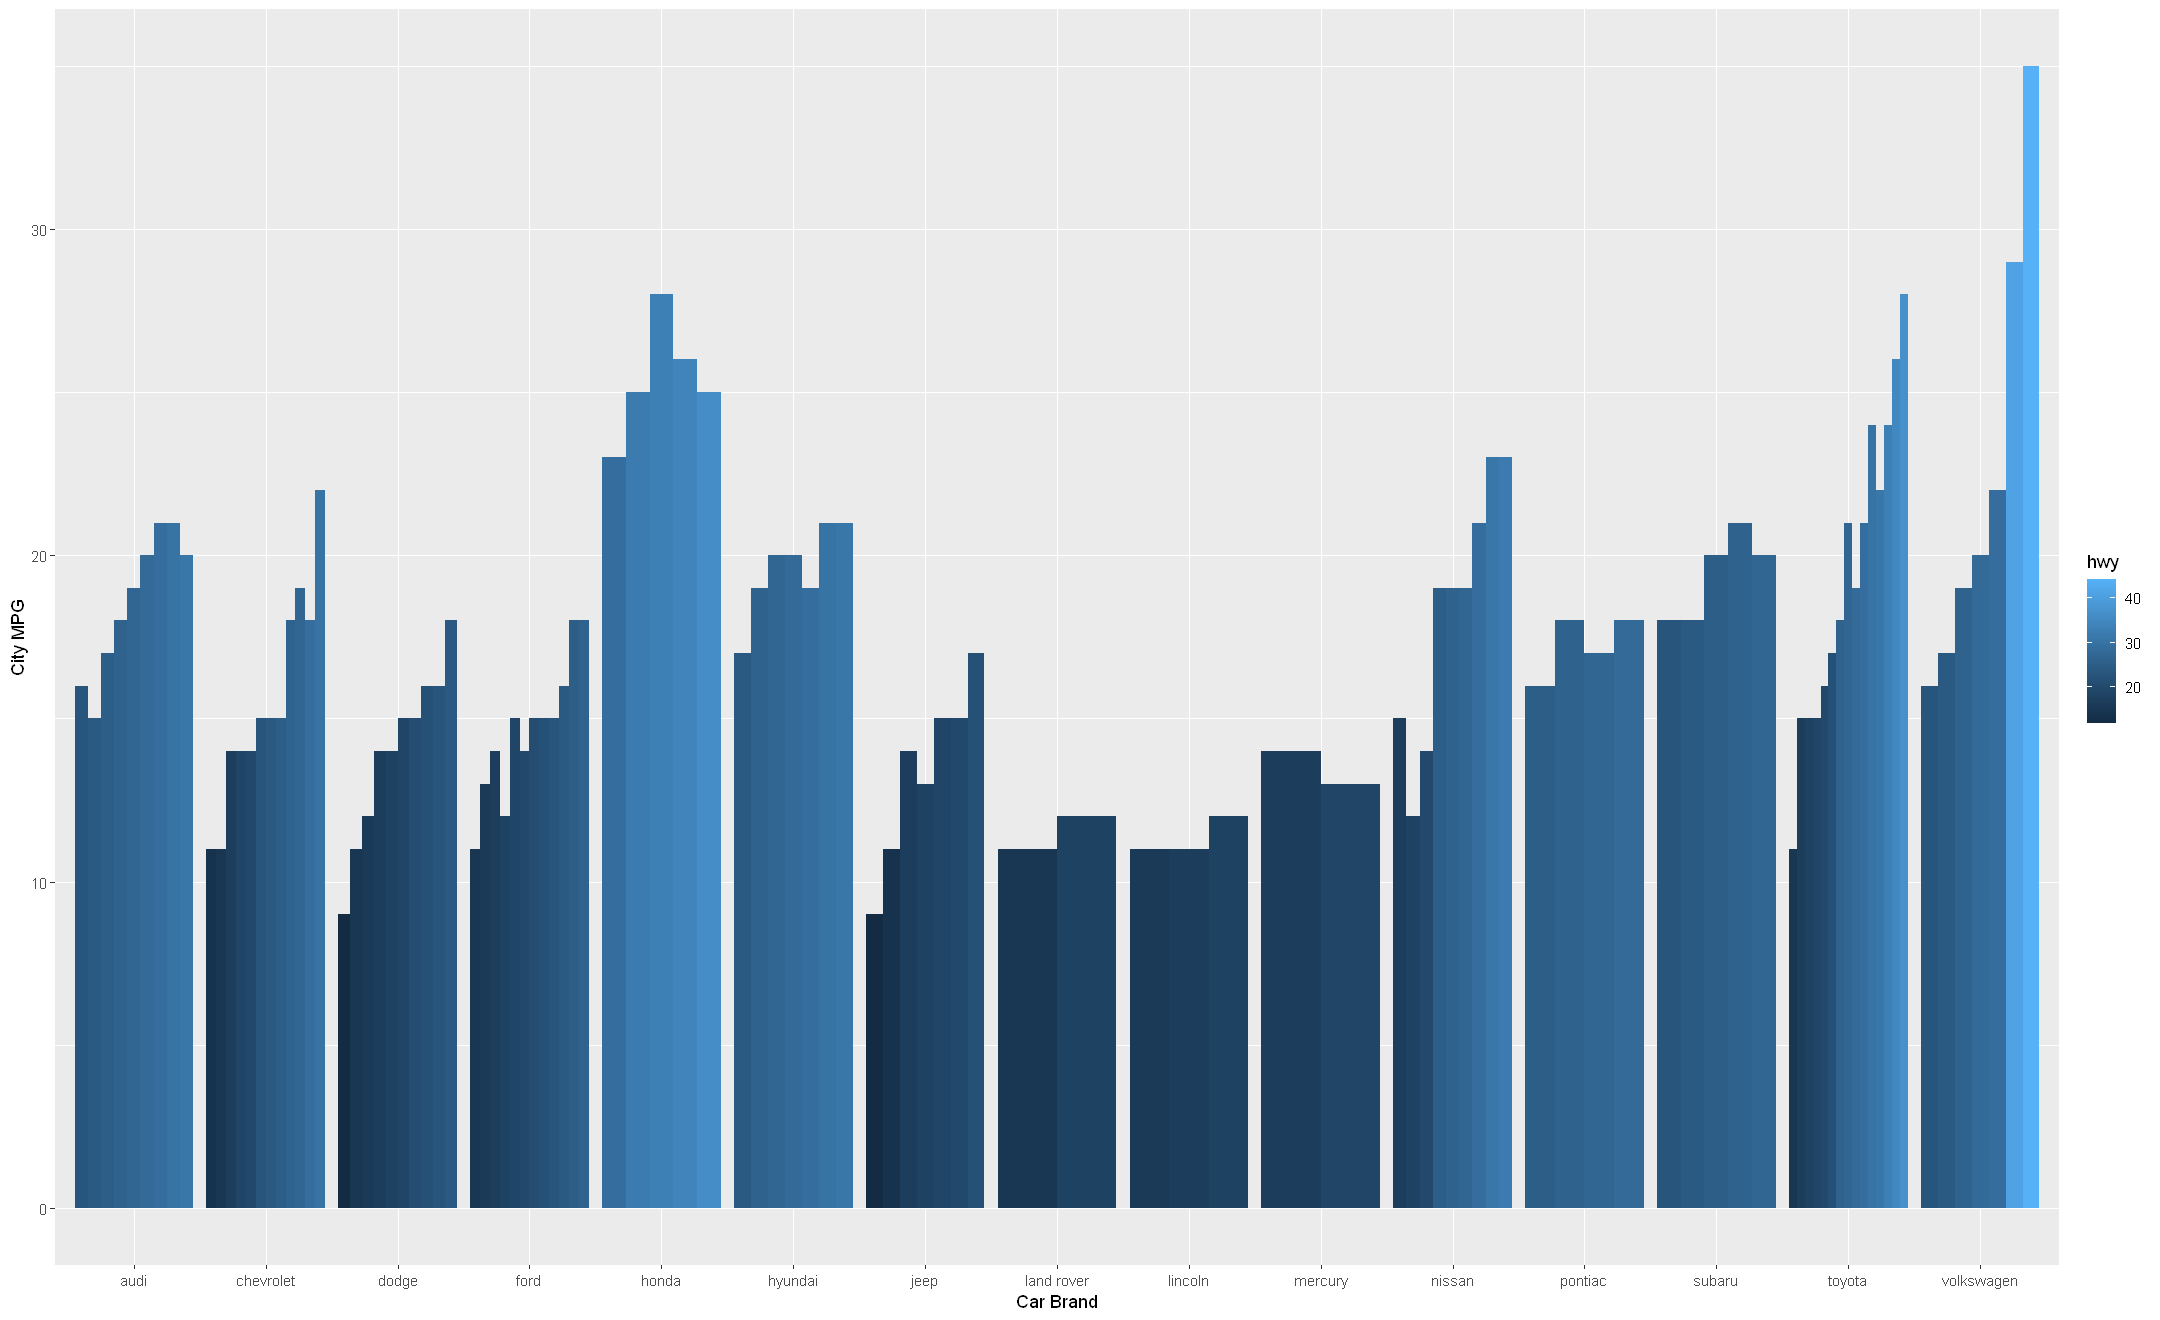

In [36]:
ggplot(mpg, aes(x=manufacturer, y=cty, group=hwy, fill=hwy))+
geom_bar(position='dodge',stat="identity")+
xlab('Car Brand')+ ylab('City MPG')

#x-axis is manufacturer, y-axis is cty, group used to add hwy in the bar plot, and fill used to identify the hwy

You can see that the brightest color is highest hwy and the highest bar is cty. Therefore, it is clear that Volkswagen has the best mpg in city and highway.

### Q2:
Plot and explain: Which type of car, regarding their size of engine, has the lowest mpg in the city categorised by the vehicle type.

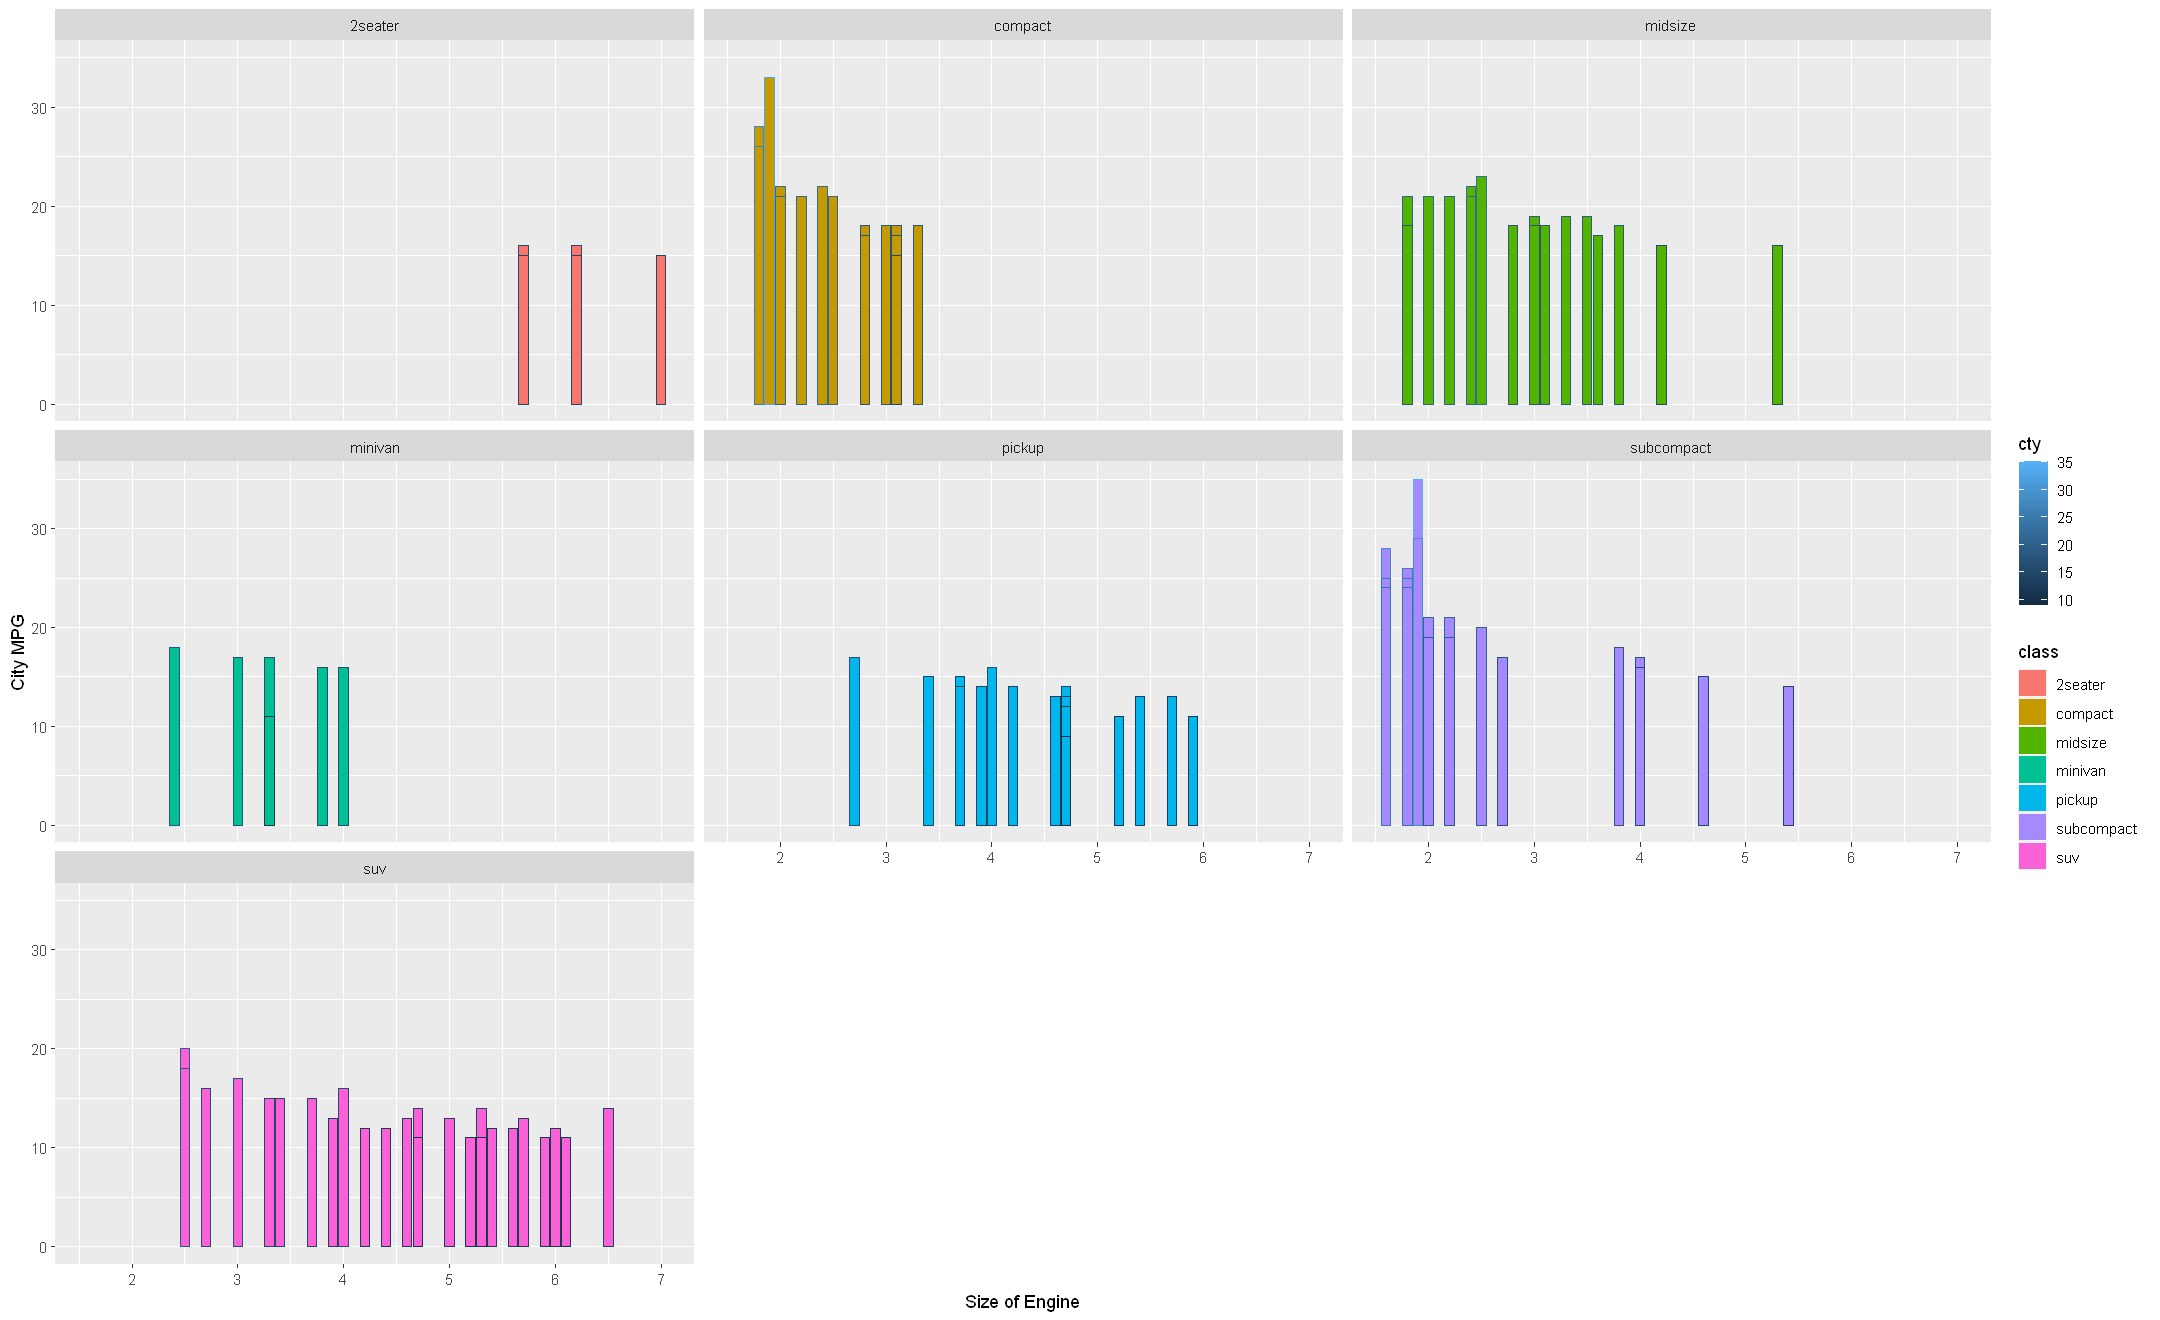

In [23]:
ggplot(mpg, aes(x=displ, y=cty,color=cty,fill=class))+
geom_bar(position='dodge',stat="identity")+
xlab('Size of Engine')+ ylab('City MPG')+
facet_wrap(~class)

# position='dodge' implements the side bar plot
# stat='identity' keeps the original data in the plot (not the percentage/ratio)

Each car type has its own plot.  The lowest city mpg for each type regarding their size engine is as follows: <br>
2Seater: 5.7L, 6.2L, and 7.0L  at 15 mpg. <br>
compact: 2.8L and 3.1L both at 15 mpg <br>
midsize: 2.8L at 15 mpg <br>
minivan: 3.3L at 11 mpg. <br>
pickup: 4.7L at 9 mpg. <br>
subcompact: 5.4L at 14 mpg <br>
SUV: 4.7L at 9 mpg  <br>

### Q3:
Plot and explain: Which type of car, regarding their size of engine has the best mpg performance in both city and highway categorised by the number of cylinders and the drive type.

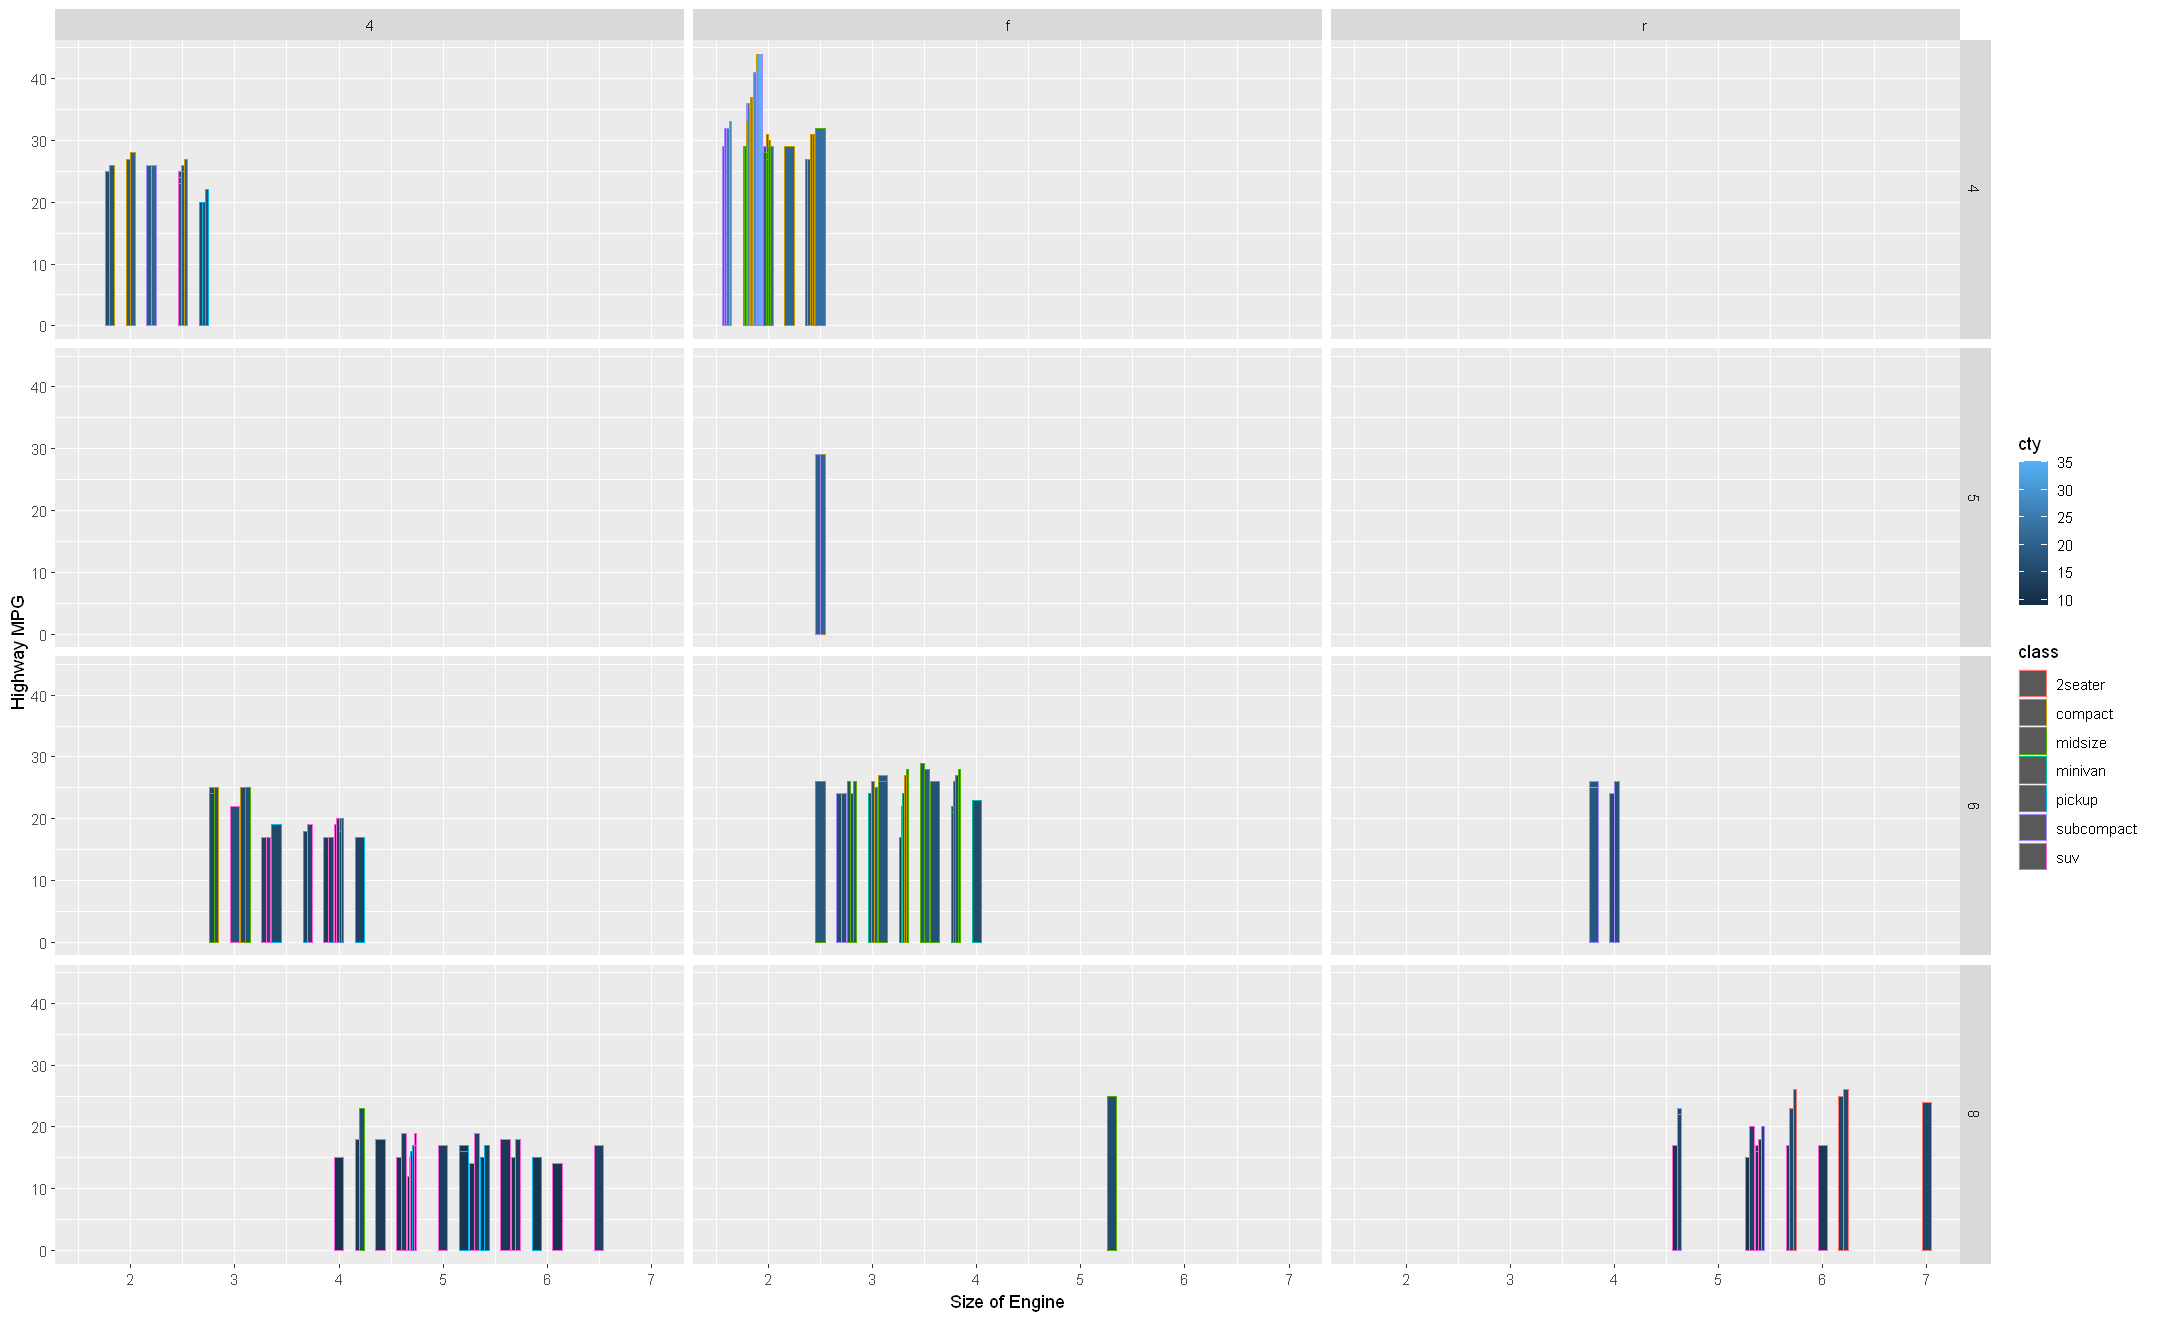

In [38]:
ggplot(mpg, aes(x=displ, y=hwy, group=cty, fill=cty, color=class))+
geom_bar(position='dodge',stat="identity")+
xlab('Size of Engine')+ ylab('Highway MPG')+
facet_grid(cyl ~ drv)

###### Q: You are a buyer who wants a high litre engine vehicle and drives mostly in the highway, which type of car would you choose?

###### A: I would choose an 8 cylinder Rear-Wheel drive 2-seater car, either a 6.2L or 5.7L engine that can run up to 26 mpg. 